In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import nltk
from sklearn import svm
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score


In [6]:
df=pd.read_pickle('cleaned_df.pkl')
df.head()

,link,published,title,text,author,label,clean_title,clean_text
0,https://www.nytimes.com/2019/11/20/business/me...,2019-11-21T04:22:14,Media Workers Call Out Pay Gaps in Crowdsource...,With income inequality a focus of the current ...,"[Marc Tracy, Tiffany Hsu]",0,media workers call pay gaps crowdsourced sprea...,income inequality focus current presidential c...
1,https://www.nytimes.com/2019/11/20/business/gm...,2019-11-21T00:07:24,G.M. Sues Rival Over Bribery Scheme as Union S...,Fiat Chrysler “was able to obtain unique advan...,[Neal E. Boudette],0,gm sues rival bribery scheme union scandal exp...,"fiat chrysler ""was able obtain unique advantag..."
2,https://www.nytimes.com/2019/11/20/business/ho...,2019-11-21T01:58:42,U.S. Bill Supporting Hong Kong Rights Heads to...,A bill compelling the United States to support...,"[David Yaffe-Bellany, Alan Rappeport]",0,us bill supporting hong kong rights heads trum...,bill compelling united states support pro demo...
3,https://www.nytimes.com/2019/11/20/business/tr...,2019-11-21T02:08:37,Trump Floats Tariff Exclusions for Apple at Te...,"Jonathan Gold, a spokesman for Americans for F...",[Ana Swanson],0,trump floats tariff exclusions apple texas man...,jonathan gold spokesman americans free trade l...
4,https://www.nytimes.com/2019/11/21/business/de...,2019-11-21T08:00:10,Henry Paulson Sounds Alarm: U.S.-China Relatio...,The United States and China will eventually se...,[Andrew Ross Sorkin],0,henry paulson sounds alarm us china relations ...,united states china eventually settle differen...


In [5]:
df.head()

,link,published,title,text,author,label,clean_title,clean_text
0,https://www.nytimes.com/2019/11/20/business/me...,2019-11-21T04:22:14,Media Workers Call Out Pay Gaps in Crowdsource...,With income inequality a focus of the current ...,"[Marc Tracy, Tiffany Hsu]",0,media workers call pay gaps crowdsourced sprea...,income inequality focus current presidential c...
1,https://www.nytimes.com/2019/11/20/business/gm...,2019-11-21T00:07:24,G.M. Sues Rival Over Bribery Scheme as Union S...,Fiat Chrysler “was able to obtain unique advan...,[Neal E. Boudette],0,gm sues rival bribery scheme union scandal exp...,"fiat chrysler ""was able obtain unique advantag..."
2,https://www.nytimes.com/2019/11/20/business/ho...,2019-11-21T01:58:42,U.S. Bill Supporting Hong Kong Rights Heads to...,A bill compelling the United States to support...,"[David Yaffe-Bellany, Alan Rappeport]",0,us bill supporting hong kong rights heads trum...,bill compelling united states support pro demo...
3,https://www.nytimes.com/2019/11/20/business/tr...,2019-11-21T02:08:37,Trump Floats Tariff Exclusions for Apple at Te...,"Jonathan Gold, a spokesman for Americans for F...",[Ana Swanson],0,trump floats tariff exclusions apple texas man...,jonathan gold spokesman americans free trade l...
4,https://www.nytimes.com/2019/11/21/business/de...,2019-11-21T08:00:10,Henry Paulson Sounds Alarm: U.S.-China Relatio...,The United States and China will eventually se...,[Andrew Ross Sorkin],0,henry paulson sounds alarm us china relations ...,united states china eventually settle differen...


In [6]:
X_body_text = df['clean_text'].values
X_title_text = df['clean_title'].values
y = df['label'].values

In [7]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_df= 0.85, min_df= 0.01)

In [8]:

X_body_tfidf = tfidf.fit_transform(X_body_text)
X_title_tfidf = tfidf.fit_transform (X_title_text)

In [9]:
indices = df.index.values

In [10]:
X_body_tfidf_train, X_body_tfidf_test, \
y_body_train, y_body_test, \
indices_body_train, indices_body_test = train_test_split(X_body_tfidf, y, indices, test_size = 0.2, random_state=42)

In [11]:
df.loc[indices_body_train].groupby('label').agg('count')

,link,published,title,text,author,clean_title,clean_text
label,,,,,,,
0,369,369,369,369,369,369,369
1,7,7,7,7,7,7,7


In [12]:
df.loc[indices_body_test].groupby('label').agg('count')

,link,published,title,text,author,clean_title,clean_text
label,,,,,,,
0,91,91,91,91,91,91,91
1,3,3,3,3,3,3,3


In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
nb_body = MultinomialNB()

In [15]:
nb_body.fit(X_body_tfidf_train, y_body_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
y_body_train_pred = nb_body.predict(X_body_tfidf_train)

In [17]:
print('Naive Bayes In Sample F1 and Accuracy Scores:')
print('F1 score {:.4}%'.format(f1_score(y_body_train, y_body_train_pred, average='macro')*100 ))
print ('Accuracy score {:.4}%'.format(accuracy_score(y_body_train, y_body_train_pred)*100))

Naive Bayes In Sample F1 and Accuracy Scores:
F1 score 49.53%
Accuracy score 98.14%


C:\Users\GB\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
np.where(y_body_train != y_body_train_pred)

(array([  5,  38,  60,  64, 326, 337, 367], dtype=int64),)

In [19]:
df.loc[[52, 449]]

,link,published,title,text,author,label,clean_title,clean_text
52,https://www.nytimes.com/2019/11/18/books/rando...,2019-11-18T22:03:50,Random House Names a New Publisher and Hires a...,"Robin Desser, the editorial director of the Pe...",[Alexandra Alter],0,random house names new publisher hires top edi...,robin desser editorial director penguin random...
449,https://fivethirtyeight.com/features/has-trump...,2018-04-12T10:01:41,Where Blue-Collar America Is Strongest,President Trump seems ready to declare victory...,[Evan Horowitz],0,blue collar america strongest,president trump seems ready declare victory ef...


In [20]:
for article in df.loc[[52, 449], 'text']:
    print(article)
    print('--------------\n\n\n\n')

Robin Desser, the editorial director of the Penguin Random House imprint Alfred A. Knopf, will fill Mr. Ward’s role and become senior vice president and editor in chief of Random House. At Knopf, Ms. Desser was a tastemaker who acquired and edited works by best-selling and award-winning authors like Chimamanda Ngozi Adichie, Edwidge Danticat, Jhumpa Lahiri, Valeria Luiselli, Julia Phillips, Arundhati Roy, Jane Smiley, Patti Smith and Cheryl Strayed. In a note to staff, Sonny Mehta, Knopf’s chairman and editor in chief, said that some of the books Ms. Desser edited are “destined to become classics” and praised her for “the joy she takes at working in the editorial trenches.”

The changes come during a period of rapid transformation at Penguin Random House, which has more than 275 imprints and is by far the biggest of the “big five” publishing companies in the United States. In the past year or so, a parade of high-profile editors have left Penguin Random House, among them Molly Stern, t

In [21]:

y_body_pred = nb_body.predict(X_body_tfidf_test)

In [22]:
# print metrics
print('Naive Bayes  Scores:')
print('F1 score {:.4}%'.format(f1_score(y_body_test, y_body_pred, average='macro')*100 ))
print ('Accuracy score {:.4}%'.format(accuracy_score(y_body_test, y_body_pred)*100))

Naive Bayes  Scores:
F1 score 49.19%
Accuracy score 96.81%


In [23]:
np.where(y_body_test != y_body_pred)

(array([21, 37, 62], dtype=int64),)

In [24]:

df.loc[0]

link           https://www.nytimes.com/2019/11/20/business/me...
published                                    2019-11-21T04:22:14
title          Media Workers Call Out Pay Gaps in Crowdsource...
text           With income inequality a focus of the current ...
author                                 [Marc Tracy, Tiffany Hsu]
label                                                          0
clean_title    media workers call pay gaps crowdsourced sprea...
clean_text     income inequality focus current presidential c...
Name: 0, dtype: object

In [26]:
print(df.loc[0, 'text'])

With income inequality a focus of the current presidential candidates, workers in journalism, advertising and book publishing have anonymously posted salary information on crowdsourced spreadsheets, many of them hoping their efforts will lead to higher pay.

“Having salaries that aren’t transparent only benefits the people at the top,” said Sarah Kobos, a senior photo editor at the consumer products website Wirecutter, which is owned by The New York Times. Ms. Kobos started a spreadsheet for journalists last week.

The document, Real Media Salaries, has more than 1,400 anonymous entries, many listing sex, racial identity and years of experience in addition to salary information. It has given rise to a pair of similar documents in the publishing and advertising industries.

On Tuesday, an Instagram account, Real Agency Salaries, linked to a spreadsheet that has more than 1,000 entries purporting to provide information on compensation in the ad business. The document, which does not iden

In [27]:
#spam word counts and worldclound\
spam = df[df['label']==1]

In [30]:
spam_words = nltk.word_tokenize(" ".join(spam['clean_text'].values.tolist()))


In [29]:
# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GB\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:
spam_counter = Counter(spam_words)
print(spam_counter.most_common(50))

[('login', 68), ('credit', 60), ('card', 53), ('step', 50), ('account', 44), ('also', 41), ('get', 39), ('details', 31), ('time', 30), ('one', 26), ('well', 24), ('article', 24), ('official', 23), ('student', 23), ('going', 22), ('enter', 22), ('great', 22), ('cards', 22), ('mybpcreditcard', 22), ('use', 21), ('order', 21), ('services', 21), ('that', 21), ('page', 21), ('website', 20), ('students', 20), ('loan', 20), ('new', 19), ('know', 19), ('click', 19), ('lakes', 19), ('information', 18), ('first', 18), ('button', 18), ('form', 18), ('loans', 18), ('visit', 17), ('need', 17), ('payment', 17), ('password', 17), ('fafsa', 17), ('help', 16), ('provide', 16), ('brunswick', 16), ('epayitonline', 15), ('service', 15), ('must', 15), ('access', 15), ('simple', 15), ('you', 15)]


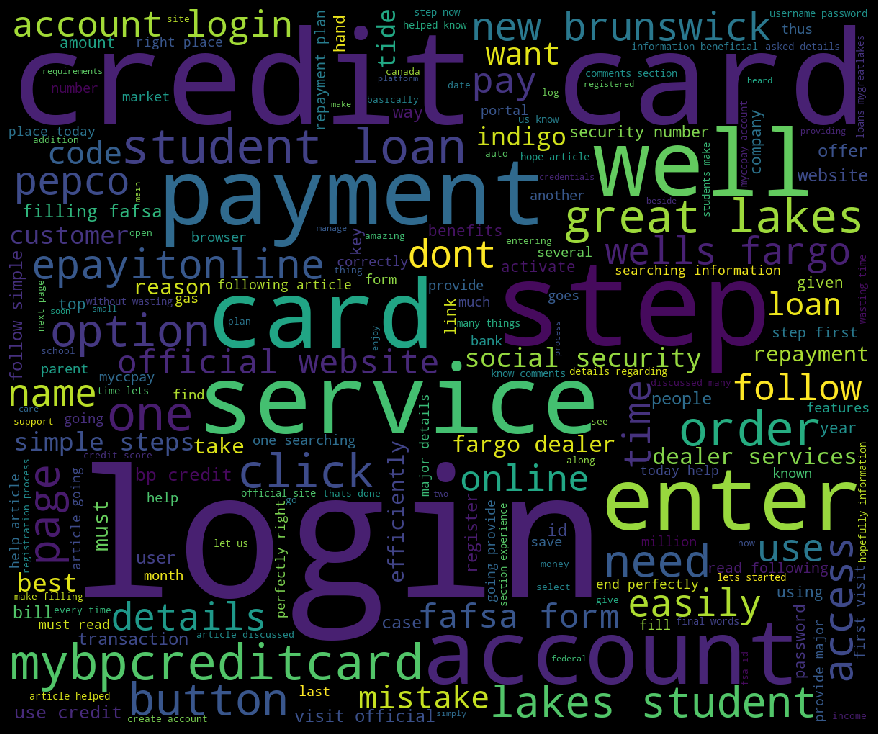

In [32]:
spam_wordcloud = WordCloud(width=1200, height=1000, random_state = 42).generate(" ".join(spam_words))
# wordcloud2 = WordCloud(width=1200, height=1000, collocations = False).generate(" ".join(spam_words)) # to turn off bigrams

fig = plt.figure(figsize=(20,10), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
spam_bigrams = nltk.bigrams(spam_words)

In [34]:
spam_counter = Counter(spam_bigrams)
print(spam_counter.most_common(10))

[(('credit', 'card'), 32), (('great', 'lakes'), 19), (('credit', 'cards'), 18), (('lakes', 'student'), 16), (('student', 'loans'), 14), (('new', 'brunswick'), 14), (('wells', 'fargo'), 13), (('account', 'login'), 12), (('official', 'website'), 12), (('fafsa', 'form'), 12)]


[('``', 1668), ("''", 1613), ('said', 1168), ('one', 680), ('%', 640), ('new', 580), ('would', 568), ("'s", 553), ('people', 551), ('us', 545), ('also', 514), ('year', 473), ('like', 461), ('?', 431), ('trump', 426), ('years', 379), ('could', 378), ('time', 375), ('first', 363), ('two', 348), ('its', 344), ('even', 335), ('company', 329), ('get', 314), ('president', 313), ('many', 295), ('make', 295), ('it', 284), ('the', 280), ('last', 273), ('may', 263), ('back', 252), ('research', 251), ('way', 249), ('much', 247), ('well', 247), ('work', 237), ('business', 232), ('made', 232), ('study', 215), ('data', 213), ('world', 209), ('climate', 208), ('found', 206), ('december', 205), ('want', 205), ('companies', 202), ('high', 202), ('change', 202), ('percent', 200)]


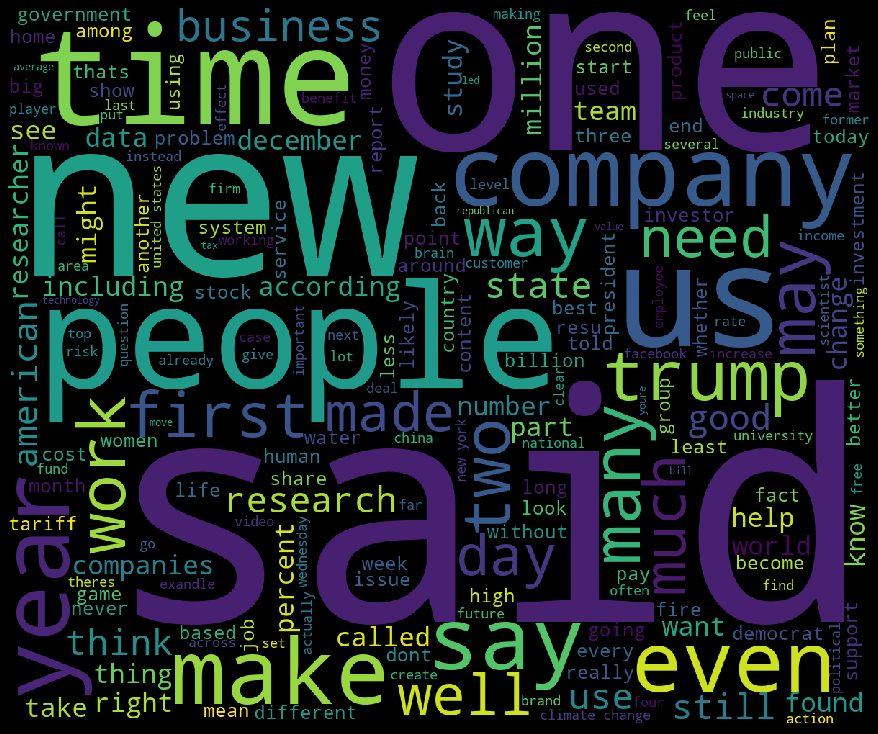

In [35]:
#ham wordcounts and wordcloud
ham = df[df['label']==0]

ham_words = nltk.word_tokenize(" ".join(ham['clean_text'].values.tolist()))

ham_counter = Counter(ham_words)
print(ham_counter.most_common(50))

ham_wordcloud = WordCloud(width=1200, height=1000, random_state = 42).generate(" ".join(ham_words))

fig = plt.figure(figsize=(20,10), facecolor = 'k' )
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [36]:
ham_bigrams = nltk.bigrams(ham_words)

ham_counter = Counter(ham_bigrams)
print(ham_counter.most_common(10))

[(("''", 'said'), 220), (('said', '``'), 123), (('``', 'the'), 123), (('climate', 'change'), 104), (('new', 'york'), 103), (('united', 'states'), 93), (('social', 'media'), 80), (('``', 'i'), 79), (('hong', 'kong'), 66), (('``', 'we'), 64)]


In [1]:
print('--------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------


In [2]:
from nltk import corpus
from nltk.tokenize import 
from nltk import stopwords

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
ds = pd.read_pickle('cleaned_df.pkl')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
